# Example Notebook

## Generate Test Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_dim = 2
n_total = int(2e5)
n_cores = 5

In [3]:
np.random.seed(42)
data_core = np.random.normal(loc=0, scale=2, size=(n_cores, n_dim))
indexes_cores= np.zeros(n_cores+1,dtype=int)
indexes_cores[1:]= np.sort(np.random.randint(0,n_total,size=n_cores))
indexes_cores[-1] = n_total
n_sizes = np.diff(indexes_cores)

data = np.zeros((n_total,n_dim))
for i in range(n_cores):
    data[indexes_cores[i]:indexes_cores[i+1],:] = np.random.normal(loc=data_core[i], scale=1, size=(n_sizes[i], n_dim))

## Epanechnikov
Just using the Epanechnikov, need to specify points and the smoothing window lambdaopt.

In [4]:
from spyders import epanechnikov_kde

In [5]:
lambdaopt =  np.abs(np.random.normal(loc=1, scale=1, size=n_total))
lambdaopt[lambdaopt<0.2] = 0.2
lambdaopt[lambdaopt>2] = 2

In [6]:
dens = epanechnikov_kde(data,data,lambdaopt, n_threads=8)

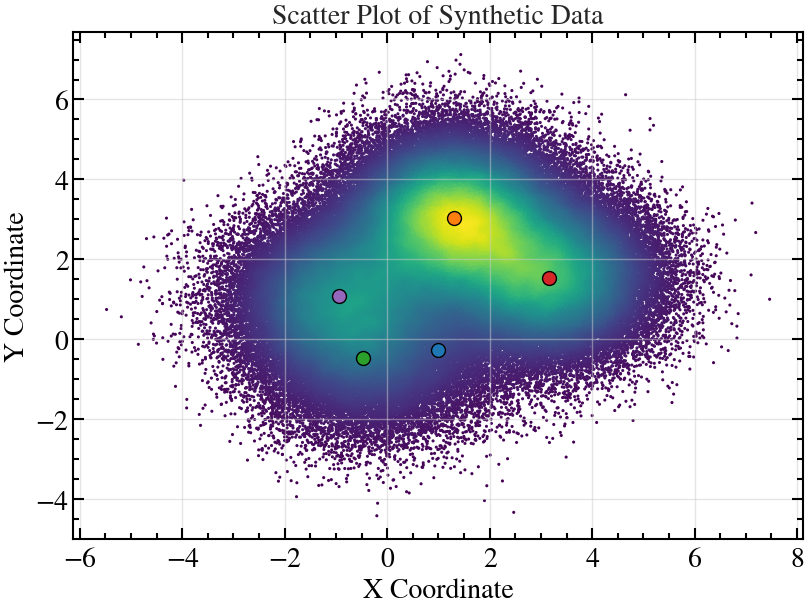

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=dens,edgecolor="none",s=5)
for i in range(n_cores):
    plt.scatter(data_core[i, 0], data_core[i, 1])
plt.title('Scatter Plot of Synthetic Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

In [23]:
n = 200  # Number of points along each axis
# # Generate grid points
x = np.linspace(-7, 7, n)
xx = np.tile(x,n)
yy = np.repeat(x,n)

# Note that without copy, the density fails.
#Due to numpy trying to be memory clever? Whereas rust assumes arrays are arrays in memory.
grid_points = np.vstack([xx,yy]).T.copy()

In [24]:
# May need to add small numerical deviations from grid
grid_points+= np.random.normal(0,0.00001,size=(n**2,2))

In [25]:
grid_dens = epanechnikov_kde(grid_points,data,lambdaopt=lambdaopt).reshape(n,n)

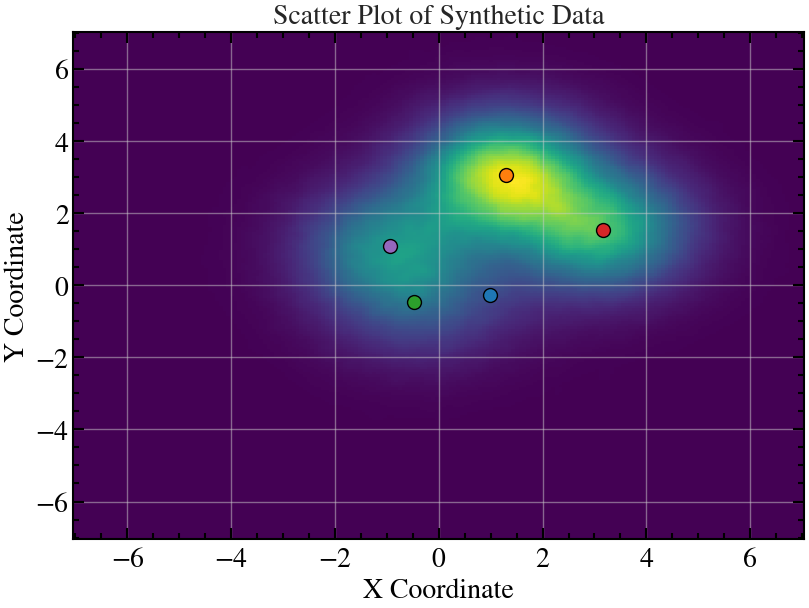

In [26]:
plt.figure(figsize=(8, 6))
plt.pcolor(x,x, grid_dens)
for i in range(n_cores):
    plt.scatter(data_core[i, 0], data_core[i, 1])
plt.title('Scatter Plot of Synthetic Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

### Weights

In [12]:
weights = np.ones(n_total)
for i in range(n_cores):
    weights[indexes_cores[i]:indexes_cores[i+1]] = np.abs(np.random.normal(loc=data_core[i,0], scale=1, size=n_sizes[i]))

In [13]:
weighted_dens = epanechnikov_kde(data,data,lambdaopt, weights=weights,n_threads=8)

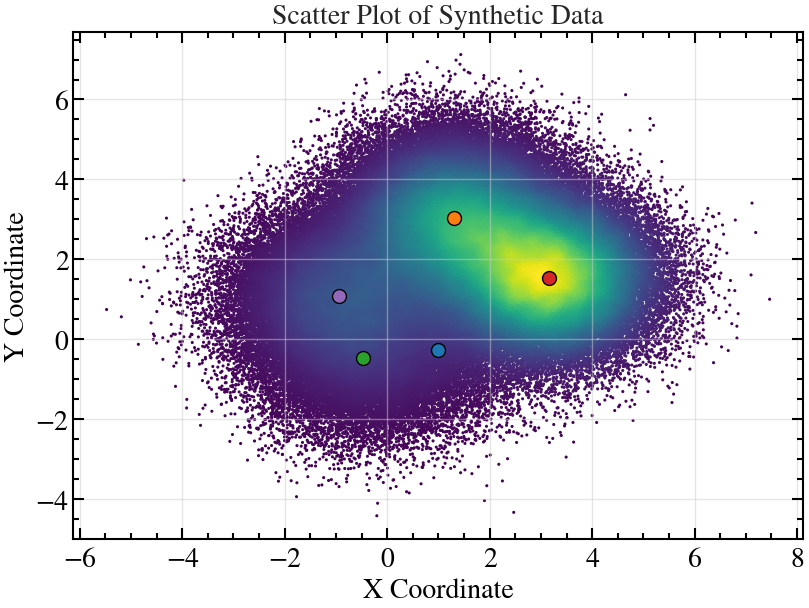

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=weighted_dens,edgecolor="none",s=5)
for i in range(n_cores):
    plt.scatter(data_core[i, 0], data_core[i, 1])
plt.title('Scatter Plot of Synthetic Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

## MBE
The MBE  provides a way to estimate

In [15]:
from spyders import MBEdens

In [16]:
MBE = MBEdens(data,verbose=True,n_iter=1)

Sigma used min: 0.21695017293425964
Iterating 1 to find density params
Iterating to find density: 1/1
med diff: 0.23344743769977977
 min labdopt: 0.6004163189617912, max 19.0444885487112


In [17]:
mbe_dens = MBE.find_dens(data)

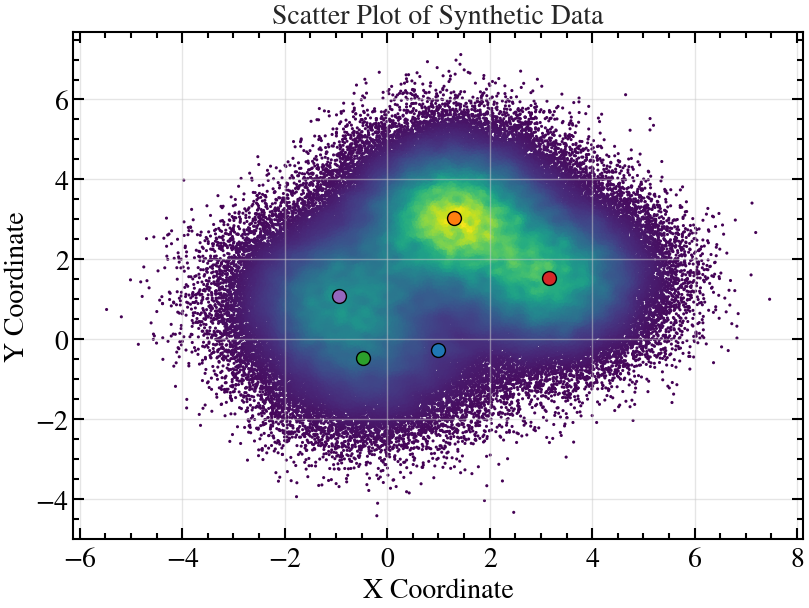

In [18]:
# Plotting the scatter points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=mbe_dens,edgecolor="none",s=5)
for i in range(n_cores):
    plt.scatter(data_core[i, 0], data_core[i, 1])
plt.title('Scatter Plot of Synthetic Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

### Weights

In [19]:
wMBE = MBEdens(data,verbose=True,n_iter=1,weights=weights)

Sigma used min: 0.21695017293425964
Iterating 1 to find density params
Iterating to find density: 1/1
med diff: 0.23344743769977977
 min labdopt: 0.6004163189617912, max 19.0444885487112


In [20]:
w_mbe_dens = wMBE.find_dens(data)

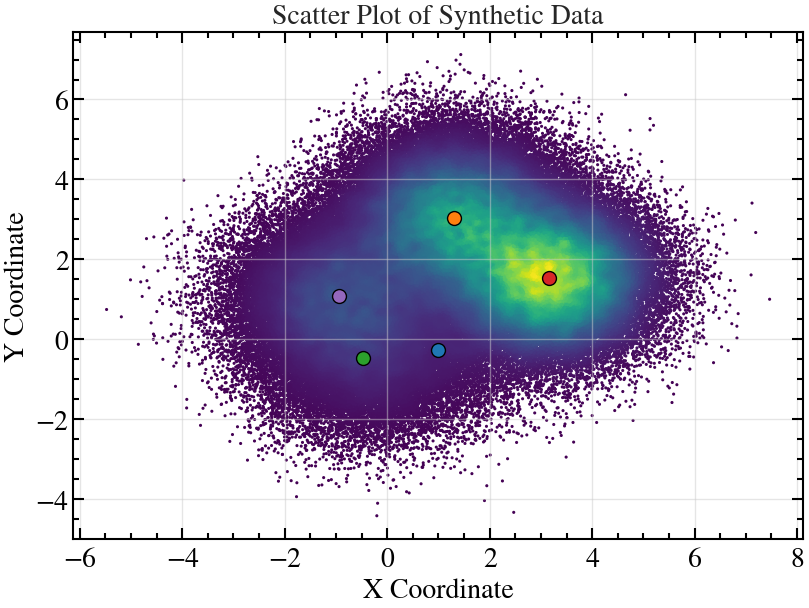

In [21]:
# Plotting the scatter points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=w_mbe_dens,edgecolor="none",s=5)
for i in range(n_cores):
    plt.scatter(data_core[i, 0], data_core[i, 1])
    
plt.title('Scatter Plot of Synthetic Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

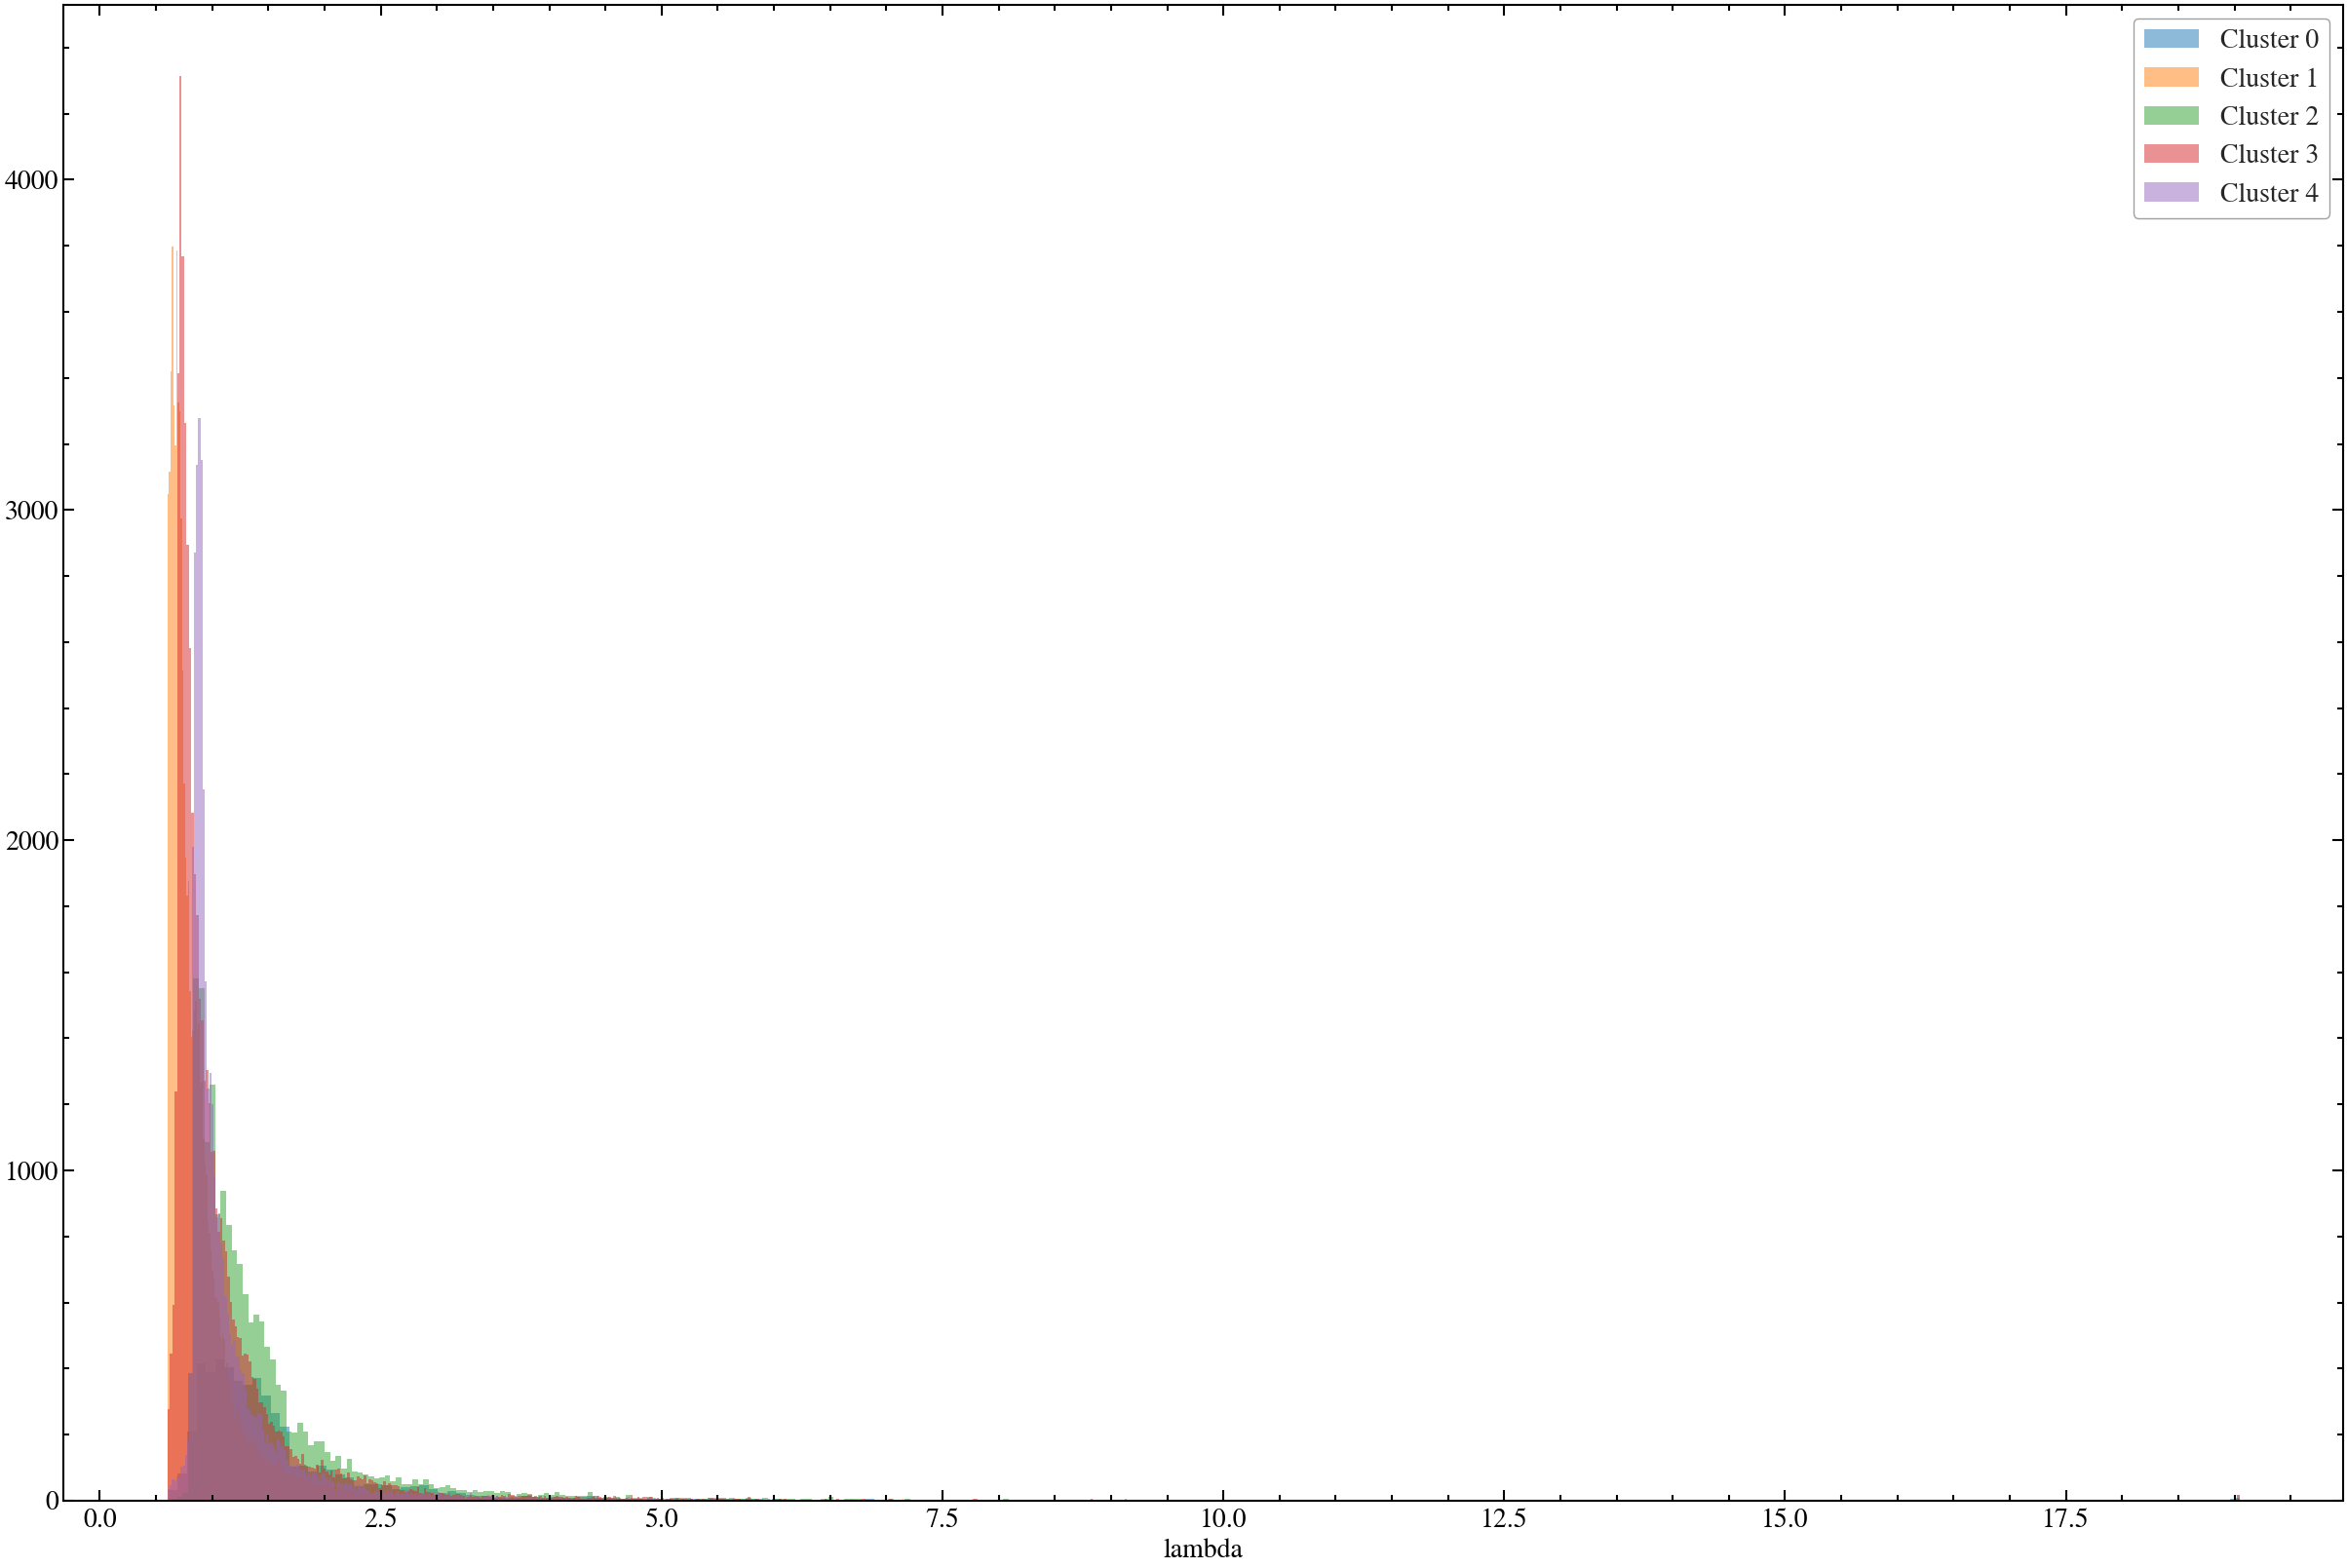

In [22]:
plt.figure()
for i in range(n_cores):
    plt.hist(MBE.lambdaopt[indexes_cores[i]:indexes_cores[i+1]],bins="auto",alpha=0.5,label=f"Cluster {i}")
    plt.xlabel("lambda")
plt.legend()
plt.show()